<a id='h1_cell'></a>
# Ingesting the data


This example uses the [Iris](https://r-data.pmagunia.com/dataset/iris) dataset, which contains four parameters for each plant:

- Sepal length
- Sepal width
- Petal length
- Petal width

Each plant also has a class (species):

- Setosa
- Versicolor
- Virginica

The sepal and petal lengths/widths can be used to train a random forest object to accurately classify plants.

Load the data:

```python
import verticapy as vp
data=vp.read_csv('Data/iris_data.csv')
```

In [1]:
import verticapy as vp
data=vp.read_csv('/project/data/DataScienceEssentials/iris_data.csv')

Examine the data:

,123sepal_lengthNumeric(7),123sepal_widthNumeric(7),123petal_lengthNumeric(7),123petal_widthNumeric(7),AbcclassVarchar(30)
1,4.3,3.0,1.1,0.1,Iris-setosa
2,4.4,2.9,1.4,0.2,Iris-setosa
3,4.4,3.0,1.3,0.2,Iris-setosa
4,4.4,3.2,1.3,0.2,Iris-setosa
5,4.5,2.3,1.3,0.3,Iris-setosa
6,4.6,3.1,1.5,0.2,Iris-setosa
7,4.6,3.2,1.4,0.2,Iris-setosa
8,4.6,3.4,1.4,0.3,Iris-setosa
9,4.6,3.6,1.0,0.2,Iris-setosa
10,4.7,3.2,1.3,0.2,Iris-setosa

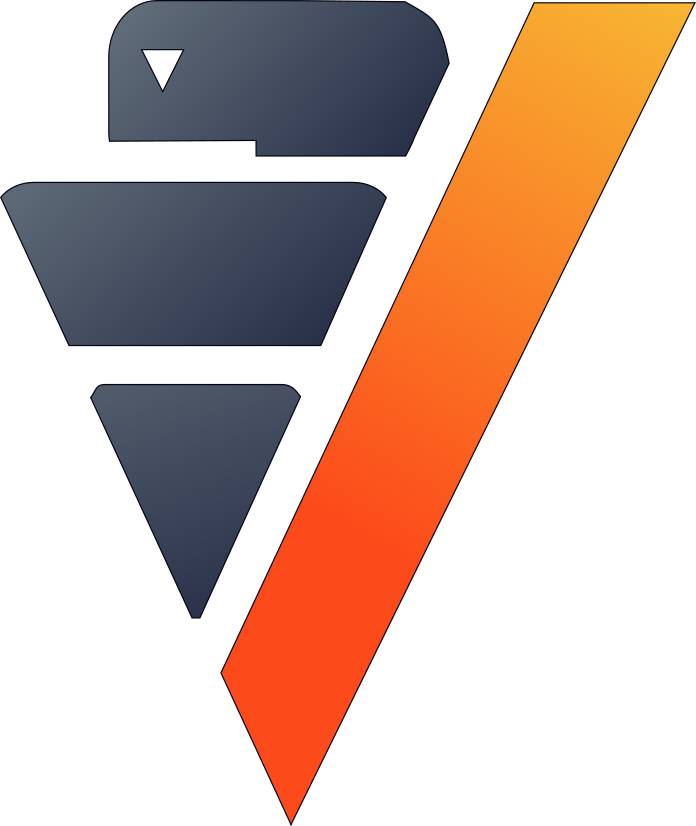

In [2]:
data

<a id='h2_cell'></a>
# Data Exploration

The next step is to find and handle missing values. You can find missing data with `describe()`, which produces a summary of the dataset:

```python
data.describe()
```

,count,mean,std,min,approx_25%,approx_50%,approx_75%,max
"""sepal_length""",150,5.84333333333333,0.828066127977863,4.3,5.1,5.8,6.4,7.9
"""sepal_width""",150,3.054,0.433594311362174,2.0,2.8,3.0,3.3,4.4
"""petal_length""",150,3.75866666666667,1.76442041995226,1.0,1.6,4.35,5.1,6.9
"""petal_width""",150,1.19866666666667,0.763160741700841,0.1,0.3,1.3,1.8,2.5

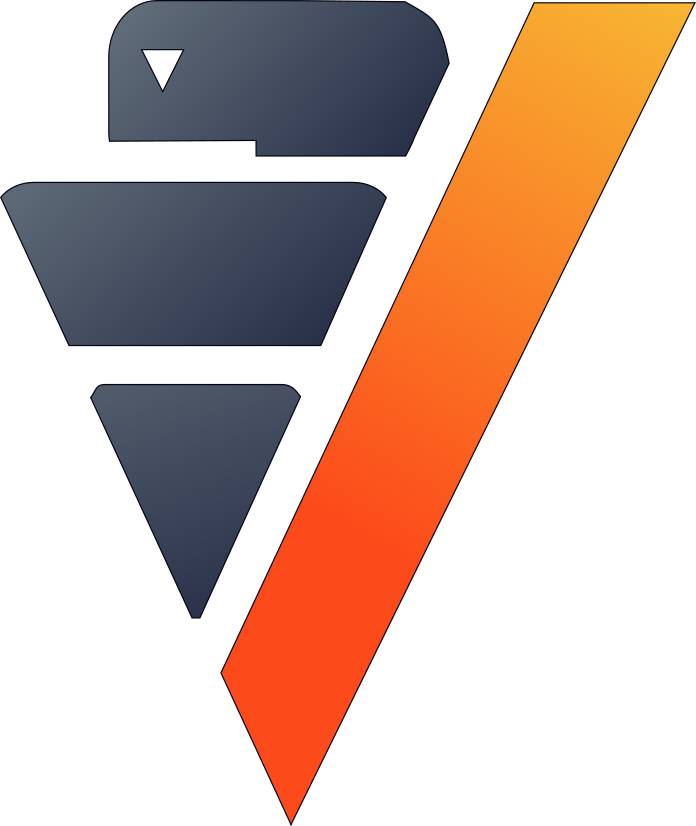

In [3]:
data.describe()

The `count` shows that all columns (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) have the same number of values, so there are no missing values in the dataset.

Next, verify if the data is balanced:

```python
data["class"].topk()
```

,count,percent
Iris-versicolor,50,33.333
Iris-virginica,50,33.333
Iris-setosa,50,33.333

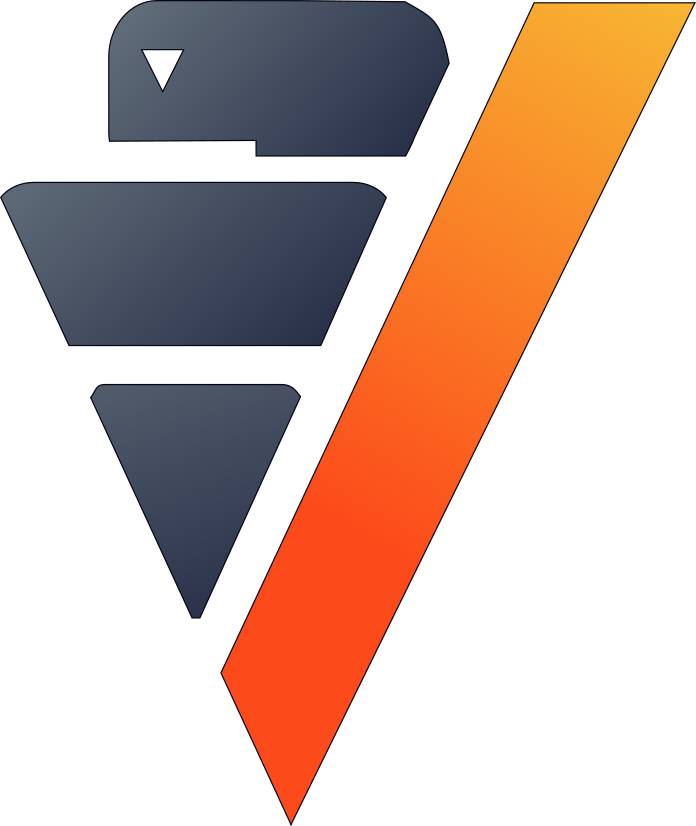

In [4]:
data["class"].topk()

The data is perfectly balanced, so there is no need to `balance()` it manually.

The next step is to train the data on the three classes:

array([[<AxesSubplot:ylabel='sepal_length'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='sepal_width'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='petal_length'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width'>]], dtype=object)

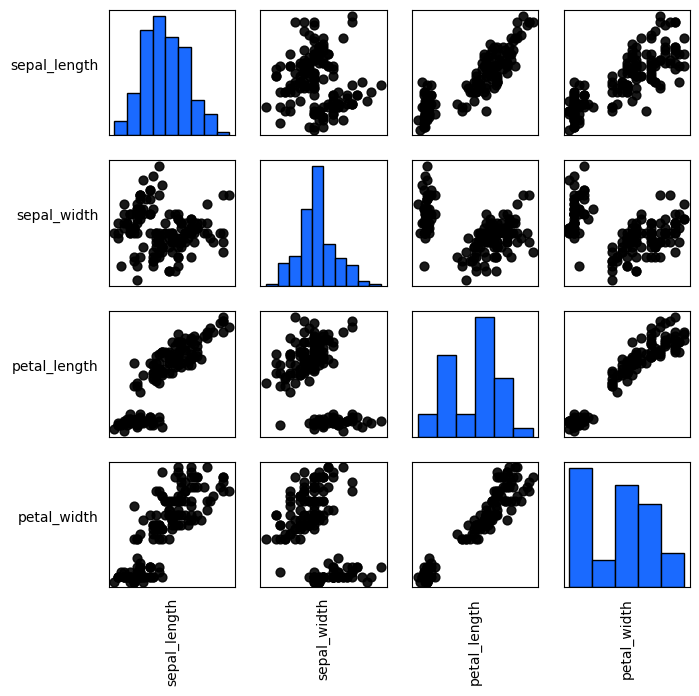

In [5]:
data.scatter_matrix()

***

<a id='h3_cell'></a>
# Applying random forest

Import the library and create a random forest model object.

In [6]:
from verticapy.machine_learning.vertica.ensemble import RandomForestClassifier
model = RandomForestClassifier("public.RF_iris")

Fit the model with the data:

In [7]:
model.fit(data, 
          ["sepal_length", "sepal_width", "petal_length", "petal_width"], 
          "class")

/usr/local/lib/python3.10/site-packages/vertica_python/vertica/connection.py:653: UserWarning: [WARNING] max_depth is set to 5 while max_breadth to 1000000000. This means the size of trees may become limited by max_depth first
  warnings.warn(notice)


'\n\n===========\ncall_string\n===========\nSELECT rf_classifier(\'public.RF_iris\', \'"public"."_verticapy_tmp_view_v_demo_5845559540_"\', \'class\', \'"sepal_length", "sepal_width", "petal_length", "petal_width"\' USING PARAMETERS exclude_columns=\'\', ntree=10, mtry=2, sampling_size=0.632, max_depth=5, max_breadth=1000000000, min_leaf_size=1, min_info_gain=0, nbins=32);\n\n=======\ndetails\n=======\n predictor  |      type      \n------------+----------------\nsepal_length|float or numeric\nsepal_width |float or numeric\npetal_length|float or numeric\npetal_width |float or numeric\n\n\n===============\nAdditional Info\n===============\n       Name       |Value\n------------------+-----\n    tree_count    | 10  \nrejected_row_count|  0  \naccepted_row_count| 150 \n'

Examine which predictors are the most important in building the trees with `features_importance()`:

```python
model.features_importance()
```

<AxesSubplot:xlabel='Importance', ylabel='Features'>

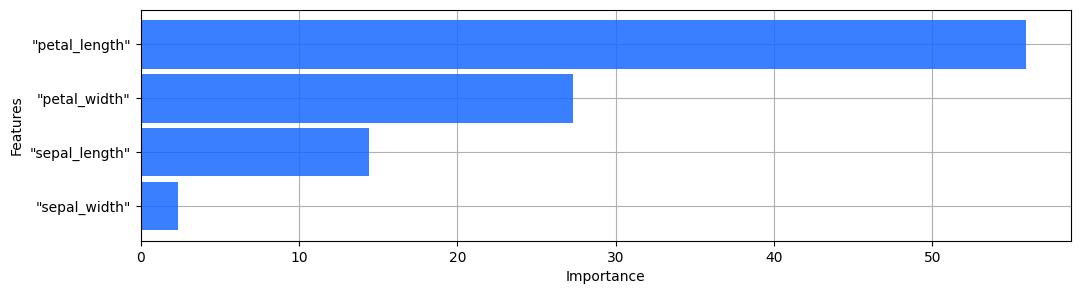

In [8]:
model.features_importance()

`petal_length` seems to be the most important, followed closely by `petal_width`. In contrast, `sepal_width` does not seem to have much impact.

You can also look at the tree with `plot_tree()`:

```python
model.plot_tree()
```

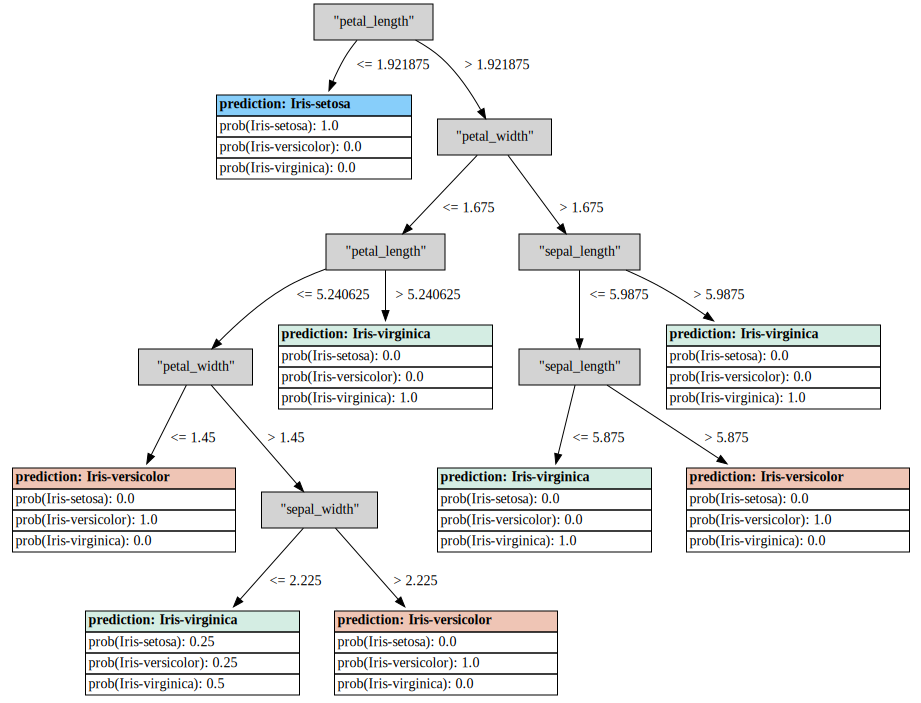

In [9]:
model.plot_tree()

You can see the different features of the tree, including its depth, number of nodes, etc.

Next, evaluate the quality of the model by scoring it:

```python
model.report()
```

,Iris-setosa,Iris-versicolor,Iris-virginica,avg_macro,avg_weighted,avg_micro
auc,1.0,0.9998000000000001,0.9998000000000001,0.9998666666666667,0.9998666666666668,[null]
prc_auc,1.0,0.9996039215686274,0.9996039215686274,0.9997359477124182,0.9997359477124181,[null]
accuracy,1.0,0.9933333333333333,0.9933333333333333,0.9955555555555554,0.9955555555555554,0.9955555555555555
log_loss,0.00385017271796396,0.0156616390075142,0.0150619307869714,0.011524580837483187,0.011524580837483187,[null]
precision,1.0,0.9803921568627451,1.0,0.9934640522875817,0.9934640522875816,0.9933333333333333
recall,1.0,1.0,0.98,0.9933333333333333,0.9933333333333333,0.9933333333333333
f1_score,1.0,0.99009900990099,0.98989898989899,0.9933326665999934,0.9933326665999933,0.9933333333333333
mcc,1.0,0.985184366143778,0.9850365626224087,0.9900736429220623,0.9900736429220622,0.99
informedness,1.0,0.99,0.98,0.9899999999999999,0.99,0.99
markedness,1.0,0.9803921568627452,0.9900990099009901,0.9901637222545784,0.9901637222545785,0.99

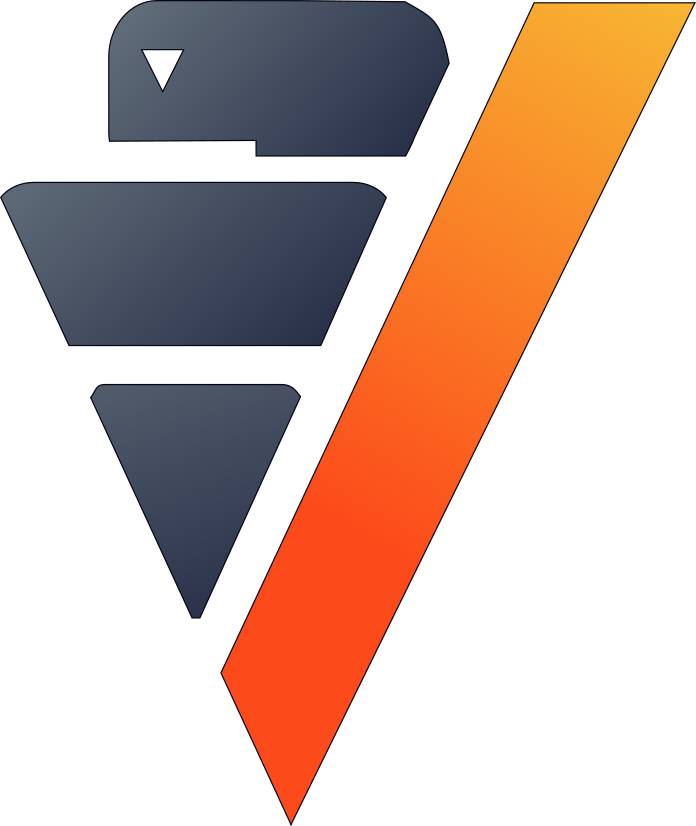

In [10]:
model.report()

The results show almost perfect results for predicting the type `Iris-setosa`. The other two classes are also predicted very accurately. However, keep in mind that because we used all the data to train the tree, accurate predictions are expected. A better test is to split the data and to use a test set to check the accuracy.

You can also get a single accuracy metric for all the classes combined with `score()`:

```python
model.score()
```

In [11]:
model.score()

0.9933333333333333

This shows the efficacy of random forests towards classifying multi-class problems. 

***

<font style="font-family:Calibri"> Author Name: Umar Farooq Ghumman
<br>
Author Contact: umarfarooq.ghumman@vertica.com</font>

### Resources

- [<font size='2'>Iris Dataset</font>](https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default)
